## Desicion Tree - Classification 

Decision tree are a non- parametric supervise learning method for classification.It is tree like graphs with 

- nodes representing the place where we pick attribute and ask a question
- edges represent the answers the to question
- an the leaves represent the actual output  or class label

In [192]:
# Import Library
# Loading data

import pandas as pd

from sklearn.datasets import load_iris


In [193]:
# reading data and info of data 
iris = load_iris()

iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [194]:
# target/output variables
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<b>The objective is to identify leaf type based on leaf dimension.</b>

In [195]:
# Data set split
from sklearn.model_selection import train_test_split

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)


### Using Sklearn to classify

####  Criterion "entropy" to

In [196]:
from sklearn import tree

clf_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_entropy = clf_entropy.fit(x_train,y_train)

### Entropy
<p>Entropy is used to measure the impurity or randomness of dataset. </p>

 - higher entropy more information content
 - high entropy , a high level of disorder , meaning low level of purity
 - information theory metric measure the impurity or uncertainty
 - Low probability then high suprise
 - expected value of suprise  in entropy



$$ E = - \sum_{i=1}^{n} p_i log_2 p_i $$

$ p_i $ probability of random selection an example in class i 

### Information Gain 

- feature with the largest entropy information gain should be the root node to build the decision tree
- Information gain is the reduction in entropy
- larger information gain suggests a lower entropy group or groups of samples, and hence less surprise
- reduction in randomness is called Information Gain (Reduction in randomness = entropy source – entropy of branches)
- Skewed Probability Distribution (unsurprising): Low entropy.
- Balanced Probability Distribution (surprising): High entropy.

In [197]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



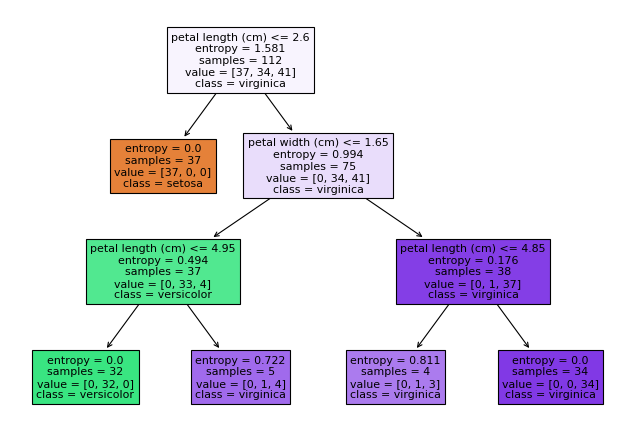

In [198]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,7),dpi=80)

_ = tree.plot_tree(clf_entropy, 
                   feature_names=iris.feature_names,  
                   class_names= iris.target_names,
                   filled=True)

#### Gini Index

In [199]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')

clf_gini = clf_gini.fit(x_train,y_train)

#### Gini Index  

<p> Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly  </p>

- It favors larger partition
- Probability of picking two distinct elements 
- you want a variable split that has a low Gini Index
- Lower value indicate lower diversity  and lower impurity

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value when the probability of the two classes are the same.

$$ Gini_{min}=1–(1^2)=0 $$
$$ Gini_{max}=1–(0.52+0.52)=0.5 $$



$$ Gini Index  = 1- \sum_{i=1}^{n}(p_i)^2 $$ 

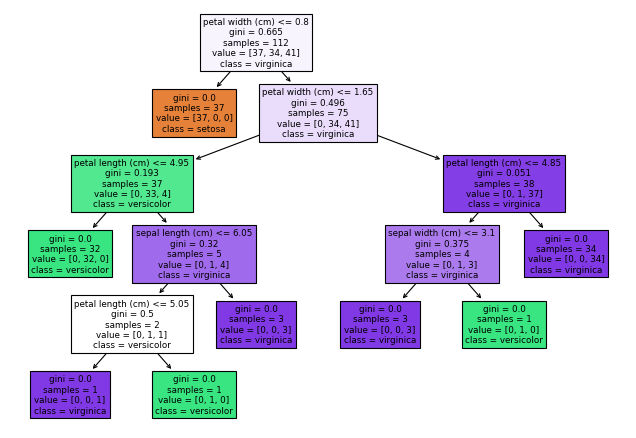

In [200]:
fig = plt.figure(figsize=(10,7),dpi=80)

_ = tree.plot_tree(clf_gini, 
                   feature_names=iris.feature_names,  
                   class_names= iris.target_names,
                   filled=True)

### Predict

In [201]:
y_pred = clf_gini.predict(x_test)

### Accuracy score

In [202]:
from sklearn.metrics import accuracy_score

print("Accuracy on train data",accuracy_score(y_true = y_train, y_pred = clf_gini.predict(x_train)))

print("Accuracy on test data",accuracy_score(y_true = y_test , y_pred = clf_gini.predict(x_test)))

Accuracy on train data 1.0
Accuracy on test data 0.9736842105263158


In [203]:
from sklearn.model_selection import cross_val_score

CV_scores = cross_val_score(clf_gini, x_train, y_train, cv=5)

print("The individual cross-validation scores are: \n",CV_scores)
print("The minimum cross-validation score is %.3f" % min(CV_scores))
print("The maximum cross-validation score is %.3f" % max(CV_scores))
print("The mean  cross-validation   score is %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std() * 2))


The individual cross-validation scores are: 
 [0.95652174 0.95652174 0.95454545 1.         0.90909091]
The minimum cross-validation score is 0.909
The maximum cross-validation score is 1.000
The mean  cross-validation   score is 0.95534 ± 0.06


### To find hyperparamenter

In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [2,3,4,5,10],
    "random_state" : [0,10,20,30,45]
}

grid_cv = GridSearchCV(tree.DecisionTreeClassifier(), param_grid).fit(x_train, y_train)



In [205]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=10)

In [206]:
clf_model1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
clf_model1.fit(x_train,y_train)

print("Accuracy on train data",accuracy_score(y_true = y_train, y_pred = clf_model1.predict(x_train)))

print("Accuracy on test data",accuracy_score(y_true = y_test , y_pred = clf_model1.predict(x_test)))



Accuracy on train data 0.9553571428571429
Accuracy on test data 0.9736842105263158


In [207]:
CV_scores1 = cross_val_score(clf_model1, x_train, y_train, cv=5)

print("The individual cross-validation scores are: \n",CV_scores1)
print("The minimum cross-validation score is %.3f" % min(CV_scores1))
print("The maximum cross-validation score is %.3f" % max(CV_scores1))
print("The mean  cross-validation   score is %.5f ± %0.2f" % (CV_scores1.mean(), CV_scores1.std() * 2))

The individual cross-validation scores are: 
 [0.95652174 0.82608696 0.86363636 1.         0.86363636]
The minimum cross-validation score is 0.826
The maximum cross-validation score is 1.000
The mean  cross-validation   score is 0.90198 ± 0.13
